# Stroke Prediction
    In this project, we will use supervised learning models to identify individuals 
    with high risk of stroke. 

## 0. Data Collection
    Data source: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [168]:
import pandas as pd
import numpy as np

data = pd.read_csv("C:\\Users\\dante\\Desktop\\DS Project\\Stroke Prediction\\healthcare-dataset-stroke-data.csv")

## 1. EDA

In [169]:
# take a peek:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [170]:
# overall info:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [171]:
data.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [172]:
data['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [173]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [174]:
data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [175]:
# missing values:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

    201 missing values in BMI, otherwise complete

In [176]:
# imputation for missing value
data['bmi'].fillna(data['bmi'].mean(), inplace = True)

In [177]:
# summary stats for numerical features:
round(data.describe(exclude = 'object'),2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,5110.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.70,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.80,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.40,0.00
75%,54682.00,61.00,0.0,0.00,114.09,32.80,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


    Stroke, whose value can only be 1 or 0, has mean of 0.05. It means the data is highly 
    unbalanced.

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

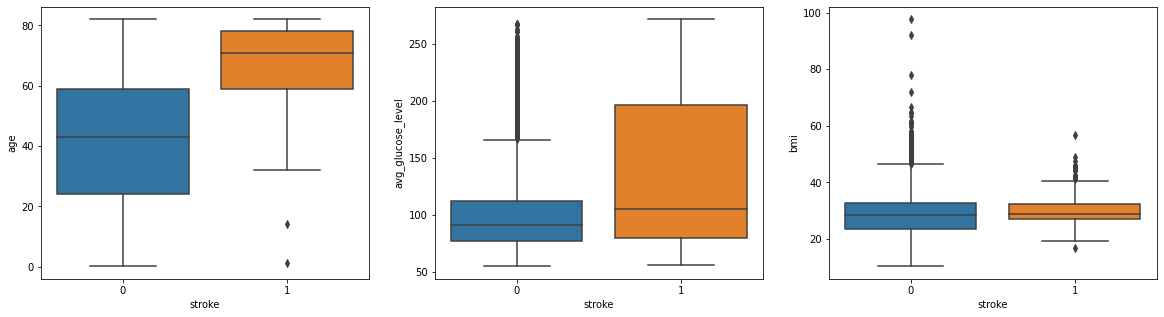

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# boxplots:
_, axss = plt.subplots(1, 3, figsize = [20,5])
sns.boxplot(x = 'stroke', y = 'age', data = data, ax = axss[0])
sns.boxplot(x = 'stroke', y = 'avg_glucose_level', data = data, ax = axss[1])
sns.boxplot(x = 'stroke', y = 'bmi', data = data, ax = axss[2])

    It looks like people who had stroke have very different distribution in age 
    and average glucose level than those who did not have stroke; but in terms
    of BMI the distribution is similar.

<AxesSubplot:>

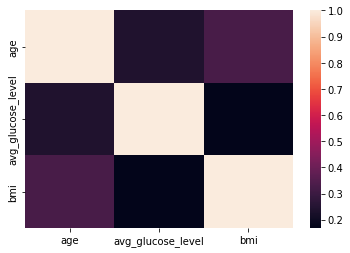

In [179]:
# check feature correlation
num_features = ['age', 'avg_glucose_level', 'bmi']
corr_score = data[num_features].corr()
sns.heatmap(corr_score)

In [180]:
corr_score

,age,avg_glucose_level,bmi
age,1.000000,0.238171,0.325942
avg_glucose_level,0.238171,1.000000,0.168751
bmi,0.325942,0.168751,1.000000


    The correlation among numerical features does not look terribly large

<AxesSubplot:xlabel='stroke', ylabel='count'>

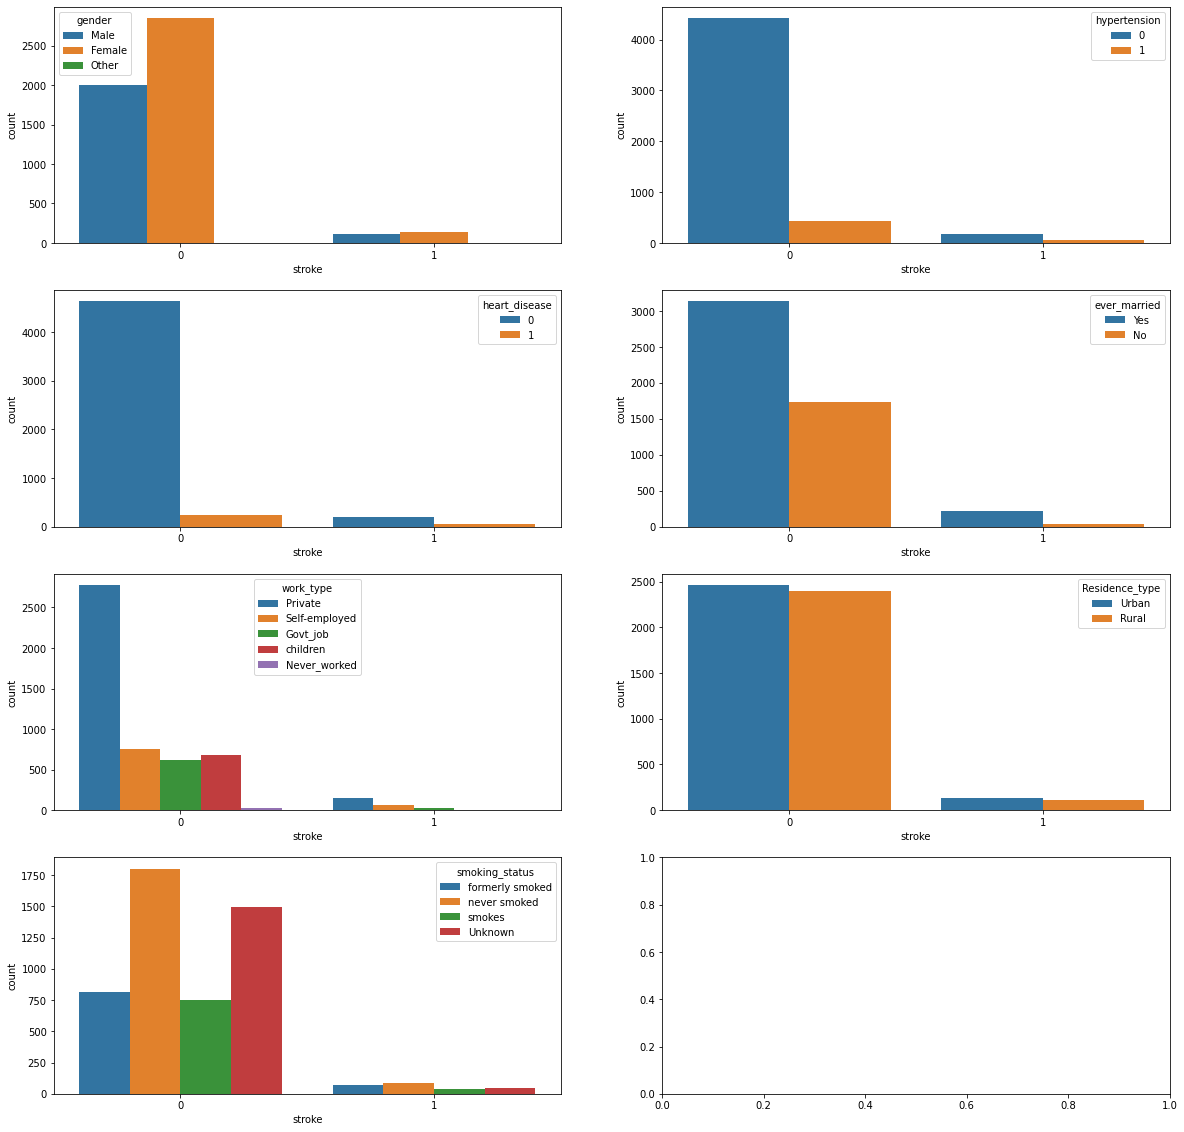

In [181]:
# count plots for categorical features:
_, axss = plt.subplots(4, 2, figsize = [20,20])
sns.countplot(x = 'stroke', hue = 'gender', data = data, ax = axss[0][0])
sns.countplot(x = 'stroke', hue = 'hypertension', data = data, ax = axss[0][1])
sns.countplot(x = 'stroke', hue = 'heart_disease', data = data, ax = axss[1][0])
sns.countplot(x = 'stroke', hue = 'ever_married', data = data, ax = axss[1][1])
sns.countplot(x = 'stroke', hue = 'work_type', data = data, ax = axss[2][0])
sns.countplot(x = 'stroke', hue = 'Residence_type', data = data, ax = axss[2][1])
sns.countplot(x = 'stroke', hue = 'smoking_status', data = data, ax = axss[3][0])

    Can't get too much from the plot since overall proportion of people who had stroke is 
    pretty small, but it seems like people who are not ever married have higher risk of 
    stroke

## 2. Data Preprocessing

In [182]:
# preprocess binary features:
data.ever_married.replace(('Yes','No'), (1,0), inplace = True)
data.Residence_type.replace(('Urban','Rural'), (1,0), inplace = True)
data.rename(columns={'Residence_type':'residence_urban'}, inplace=True)

In [183]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_urban,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1


In [184]:
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

    Only one person has gender 'Other', I'll just discard this entry.

In [185]:
data = data[(data['gender'] == 'Male') | (data['gender'] == 'Female')]
data.gender.replace(('Male','Female'), (1,0), inplace = True)
data.rename(columns={'gender':'gender_male'}, inplace=True)

In [186]:
# get feature space and target variable:
to_drop = ['id', 'stroke']
X = data.drop(to_drop, axis = 1)
y = data['stroke']

X.head()

,gender_male,age,hypertension,heart_disease,ever_married,work_type,residence_urban,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked
1,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked
2,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked
3,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes
4,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked


In [187]:
X.dtypes

gender_male            int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type             object
residence_urban        int64
avg_glucose_level    float64
bmi                  float64
smoking_status        object
dtype: object

In [188]:
# marking num and cat features for processing:
num_cols = X.columns[(X.dtypes == 'int64') | (X.dtypes == 'float64')]
cat_cols = X.columns[X.dtypes == 'O']


In [189]:
num_cols

Index(['gender_male', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'residence_urban', 'avg_glucose_level', 'bmi'],
      dtype='object')

In [190]:
cat_cols

Index(['work_type', 'smoking_status'], dtype='object')

In [191]:
# one hot encoding for cat features:
from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, cat):
    transformed = pd.DataFrame(enc.transform(df[cat]).toarray(), \
        columns = enc.get_feature_names(cat))
    return pd.concat([df.reset_index(drop = True), \
        transformed], axis = 1).drop(cat, axis = 1)

cat_features = ['work_type', 'smoking_status']
enc_ohe = OneHotEncoder()
for cat in cat_features:
    enc_ohe.fit(X[[cat]])
    X = OneHotEncoding(X, enc_ohe, [cat])

In [192]:
X.head()

,gender_male,age,hypertension,heart_disease,ever_married,residence_urban,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.600000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,61.0,0,0,1,0,202.21,28.893237,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,80.0,0,1,1,0,105.92,32.500000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,49.0,0,0,1,1,171.23,34.400000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,79.0,1,0,1,0,174.12,24.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [193]:
# standardization for num features:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X[num_cols])
X[num_cols] = scaler.transform(X[num_cols])


X.describe()

,gender_male,age,hypertension,heart_disease,ever_married,residence_urban,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,4.728607e-17,7.231987e-17,-6.119374e-17,-6.953834e-17,9.179061e-17,-8.622754e-17,-1.613289e-16,-1.696735e-16,0.128597,0.004306,0.572323,0.160305,0.134469,0.302212,0.173028,0.370327,0.154433
std,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,0.334786,0.065486,0.494790,0.366925,0.341188,0.459261,0.378308,0.482939,0.361399
min,-8.404837e-01,-1.908332e+00,-3.286375e-01,-2.389715e-01,-1.381830e+00,-1.016380e+00,-1.126761e+00,-2.415661e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.404837e-01,-8.062312e-01,-3.286375e-01,-2.389715e-01,-1.381830e+00,-1.016380e+00,-6.382516e-01,-6.618409e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-8.404837e-01,7.827984e-02,-3.286375e-01,-2.389715e-01,7.236782e-01,9.838840e-01,-3.149342e-01,-6.424281e-02,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.189791e+00,7.858887e-01,-3.286375e-01,-2.389715e-01,7.236782e-01,9.838840e-01,1.755632e-01,5.073727e-01,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.189791e+00,1.714625e+00,3.042866e+00,4.184599e+00,7.236782e-01,9.838840e-01,3.657189e+00,8.925710e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [194]:
X.head()

,gender_male,age,hypertension,heart_disease,ever_married,residence_urban,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.189791,1.051242,-0.328637,4.184599,0.723678,0.983884,2.706450,1.001041,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.840484,0.785889,-0.328637,-0.238972,0.723678,-1.016380,2.121652,-0.000165,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.189791,1.626174,-0.328637,4.184599,0.723678,-1.016380,-0.004867,0.468399,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.840484,0.255182,-0.328637,-0.238972,0.723678,0.983884,1.437473,0.715233,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.840484,1.581949,3.042866,-0.238972,0.723678,-1.016380,1.501297,-0.635858,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Balancing data using SMOTE

In [195]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [196]:
X.describe()

,gender_male,age,hypertension,heart_disease,ever_married,residence_urban,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000
mean,0.020026,0.531262,0.278568,0.301232,0.239795,0.023377,0.278813,0.063241,0.127677,0.002263,0.590420,0.207146,0.072493,0.243899,0.233559,0.367755,0.154786
std,0.990162,0.970854,1.293372,1.448456,0.875894,0.987876,1.196163,0.843739,0.312444,0.047524,0.468799,0.382730,0.258258,0.410798,0.397690,0.460399,0.341220
min,-0.840484,-1.908332,-0.328637,-0.238972,-1.381830,-1.016380,-1.126761,-2.415661,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.840484,-0.054397,-0.328637,-0.238972,0.723678,-1.016380,-0.593202,-0.415007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.840484,0.785889,-0.328637,-0.238972,0.723678,0.983884,-0.215141,-0.000165,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.189791,1.336649,-0.328637,-0.238972,0.723678,0.983884,0.938353,0.442416,0.000000,0.000000,1.000000,0.100653,0.000000,0.432632,0.378919,1.000000,0.000000
max,1.189791,1.714625,3.042866,4.184599,0.723678,0.983884,3.657189,8.925710,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [197]:
y.describe()

count    9720.000000
mean        0.500000
std         0.500026
min         0.000000
25%         0.000000
50%         0.500000
75%         1.000000
max         1.000000
Name: stroke, dtype: float64

### Spliting Data into Training and Testing Sets
    Stratify train-test split

In [198]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, \
    test_size = 0.25, stratify = y, random_state = 1)

print('training data has ' + str(X_train.shape[0]) + \
    ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + \
    ' observation with ' + str(X_test.shape[1]) + ' features')


training data has 7290 observation with 17 features
test data has 2430 observation with 17 features


## 3. Model Training and Result Evaluation

In [199]:
# build models:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier

classifier_logistic = LogisticRegression()
classifier_KNN = KNeighborsClassifier()
classifier_RF = RandomForestClassifier()

### Logistic Regression

In [200]:
# Train logistic regression model
classifier_logistic.fit(X_train, y_train)
# Accuracy
classifier_logistic.score(X_test, y_test)

0.7921810699588477

KNN

In [201]:
classifier_KNN.fit(X_train, y_train)
classifier_KNN.score(X_test, y_test)

0.8905349794238683

Random Forest

In [202]:
classifier_RF.fit(X_train, y_train)
classifier_RF.score(X_test, y_test)

0.9539094650205762

### 10-fold CV for each model

In [216]:
model_names = ['Logistic Regression', 'K Nearest Neighbor', "Random Forest"]
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

X = pd.concat([X_train, X_test])

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv = 10)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    print('\n')
    count += 1

[0.76680384 0.80521262 0.75994513 0.78463649 0.8175583  0.83127572
 0.79561043 0.80109739 0.77640604 0.79286694]
Model accuracy of Logistic Regression is 0.7931412894375858


[0.90260631 0.89300412 0.87654321 0.8861454  0.91495199 0.90397805
 0.89300412 0.91632373 0.90260631 0.90534979]
Model accuracy of K Nearest Neighbor is 0.8994513031550069


[0.95198903 0.95884774 0.9382716  0.95747599 0.95610425 0.96433471
 0.95747599 0.95884774 0.94375857 0.95336077]
Model accuracy of Random Forest is 0.9540466392318245




### Tuning Hyperparameter using Grid Search

In [238]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'penalty': ('l1', 'l2'),
    'C': (0.01, 0.04, 0.05, 0.06, 0.1, 0.2, 0.5)
} 

Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'), parameters, cv = 10)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.01, 0.04, 0.05, 0.06, 0.1, 0.2, 0.5),
                         'penalty': ('l2', 'l2')})

In [239]:
def print_grid_search_metrics(gs):
    print('Best score: ' + str(gs.best_score_))
    print('Best parameters set:')
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

print_grid_search_metrics(Grid_LR)

Best score: 0.7934156378600823
Best parameters set:
C:0.1
penalty:l2


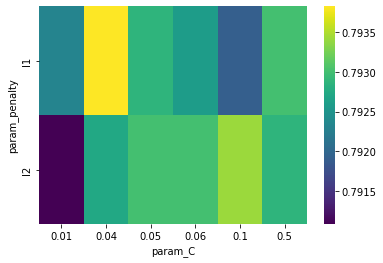

In [206]:
# heatmap for all models tested
LR_models = pd.DataFrame(Grid_LR.cv_results_)
res = (LR_models.pivot(index = 'param_penalty', columns = 'param_C', \
    values = 'mean_test_score'))
_ = sns.heatmap(res, cmap = 'viridis')

    For some reason, all values of lambda yields same performance. 
    Maybe there's and error somewhere in the process.

In [207]:
# KNN: choose k, number of neighbors
parameters = {
    'n_neighbors':[1,3,5]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv = 10)
Grid_KNN.fit(X_train, y_train)

# Best K
print_grid_search_metrics(Grid_KNN)

Best score: 0.9434842249657066
Best parameters set:
n_neighbors:1


In [208]:
# Random Forest: choose n, number of trees; choose maximum depth of each tree
parameters = {
    'n_estimators' : [180,200,220],
    'max_depth': [15,25,35]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv = 10)
Grid_RF.fit(X_train, y_train)

# Best number of tres and depth
print_grid_search_metrics(Grid_RF)


Best score: 0.955692729766804
Best parameters set:
max_depth:25
n_estimators:220


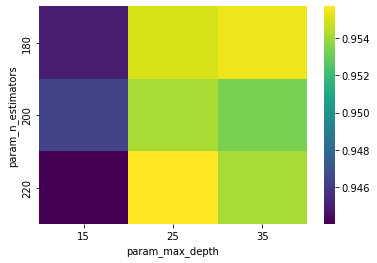

In [209]:
# heatmap for all models tested
RF_models = pd.DataFrame(Grid_RF.cv_results_)
res = (RF_models.pivot(index = 'param_n_estimators', columns = \
    'param_max_depth', values = 'mean_test_score'))
_ = sns.heatmap(res, cmap = 'viridis')

In [210]:
# Best models
best_LR_model = Grid_LR.best_estimator_
best_KNN_model = Grid_KNN.best_estimator_
best_RF_model = Grid_RF.best_estimator_

### Evaluation: Comfusion Matrix

In [211]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

    True positive: corretly labeled real churn
    Metrics:
        1. Precision = tp / (tp + fp) = true positives among all positives
           High precision means low fp, i.e. not many people who do not have stroke will 
           be predicted to have stroke
        2. Recall = tp / (tp + fn) = true positives among all stroke patients
           High recall means low fn, i.e. not many peoplw who have stroke are predicted 
           to not have stroke
           

In [212]:
# Calculate accuracy, precision and recall
def cal_evaluation(classifier, cm):
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print(classifier)
    print("Accuracy is: " + str(accuracy))
    print("Precision is: " + str(precision))
    print("Recall is: " + str(recall))
    print()

# Print out confusion matrices
def draw_confusion_matrices(confusion_matrices):
    class_names = ['Not', 'Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

In [167]:
# Confusion matrix, accuracy, precision, and recall for all three models
confusion_matrices = [
    ("Logistic Regression", confusion_matrix(y_test, best_LR_model.predict(X_test))),
    ("K Nearest Neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test))),
    ("Random Forest", confusion_matrix(y_test, best_RF_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

Logistic Regression
Accuracy is: 0.7942386831275721
Precision is: 0.7622890682318415
Recall is: 0.8551440329218107

K Nearest Neighbor
Accuracy is: 0.942798353909465
Precision is: 0.9032983508245878
Recall is: 0.9917695473251029

Random Forest
Accuracy is: 0.9555555555555556
Precision is: 0.9481781376518219
Recall is: 0.9637860082304527



    With the help of SMOTE to balance the data, the 'accuracy conundrum' is solved.
    
    Overall, three model performed well, expecially the non-linear models. Random Forest, 
    being the most complex model of all three, is performing very good.
    (0.96 accuracy, 0.95 precision, and 0.96 recall)

### Model Evaluation: ROC & AUC

In [214]:
from sklearn.metrics import roc_curve
from sklearn import metrics
# Logistic Regression:
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresh = roc_curve(y_test, y_pred_lr)

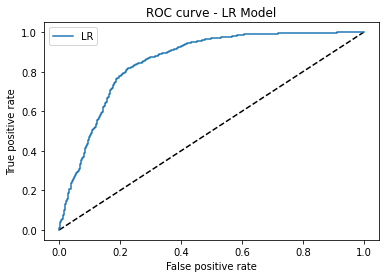

In [217]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [218]:
# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.8526146082067436

In [246]:
# Random Forest:
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

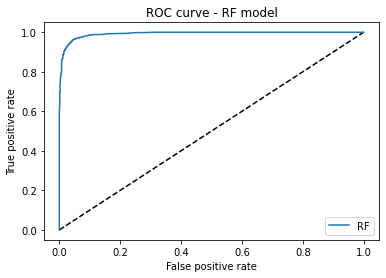

In [220]:
# ROC curve
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [221]:
# AUC score
metrics.auc(fpr_rf, tpr_rf)

0.9924425477146099

In [222]:
# KNN:
y_pred_knn = best_KNN_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresh = roc_curve(y_test, y_pred_knn)

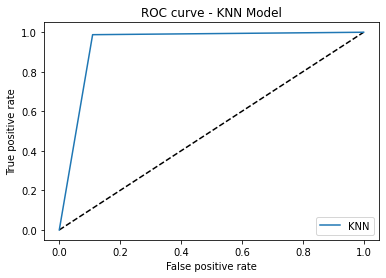

In [223]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - KNN Model')
plt.legend(loc='best')
plt.show()

In [143]:
# AUC score
metrics.auc(fpr_knn,tpr_knn)

0.9533272367017223

## 4. Feature Importance Discussion

### Logistic Regression

In [242]:
# L1 relularization
X_with_corr = X.copy()

scaler = StandardScaler()
X_l1 = scaler.fit_transform(X_with_corr)
LRmodel_l1 = LogisticRegression(penalty="l1", C = 0.05, solver='liblinear')
LRmodel_l1.fit(X_l1, y)

indices = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]
print(LRmodel_l1.coef_)
for ind in range(X_with_corr.shape[1]):
  print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l1.coef_[0][indices[ind]], 4)))

[[-0.00831038  0.          0.01428375  0.          0.01751574  0.00521652
   0.00260546  0.01871128  0.01743391 -0.01524845  0.          0.
  -0.00166835  0.         -0.00096862  0.          0.        ]]
bmi : 0.0187
ever_married : 0.0175
work_type_Govt_job : 0.0174
work_type_Never_worked : -0.0152
hypertension : 0.0143
gender_male : -0.0083
residence_urban : 0.0052
avg_glucose_level : 0.0026
work_type_children : -0.0017
smoking_status_formerly smoked : -0.001
work_type_Private : 0.0
work_type_Self-employed : 0.0
smoking_status_never smoked : 0.0
smoking_status_Unknown : 0.0
heart_disease : 0.0
age : 0.0
smoking_status_smokes : 0.0


    With L1 regularization, we see that BMI, having ever married, and hypertension have the most 
    negative impact on risk of stroke (increases the risk), while status of never worked and being 
    male have the most positive impact on risk of stroke

In [243]:
np.random.seed()
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X_with_corr)
LRmodel_l2 = LogisticRegression(penalty="l2", C = 0.1, solver='liblinear', random_state=42)
LRmodel_l2.fit(X_l2, y)
LRmodel_l2.coef_[0]

indices = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print ("Logistic Regression (L2) Coefficients")
for ind in range(X_with_corr.shape[1]):
  print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l2.coef_[0][indices[ind]], 4)))

Logistic Regression (L2) Coefficients
age : -0.0358
ever_married : 0.0342
work_type_Never_worked : -0.0257
hypertension : 0.0256
work_type_children : -0.024
work_type_Govt_job : 0.0229
bmi : 0.0195
residence_urban : 0.0148
gender_male : -0.0147
avg_glucose_level : 0.0142
smoking_status_Unknown : 0.0073
smoking_status_formerly smoked : -0.0073
work_type_Self-employed : 0.0071
work_type_Private : -0.0052
smoking_status_smokes : -0.0037
smoking_status_never smoked : 0.0025
heart_disease : 0.0004


    With L2 regularization, we see that factors that have the most negative impact on the risk of 
    stroke is: having ever married, hypertension, government job working type, and BMI, which aligns 
    well with the results from using L1 mothod. Age, having never worked, being children, and being 
    male have the most positive impact on the risk of stroke, which also agree with results from 
    using L1. However, it is surprising to see age associating with reduced risk of stroke, 
    because stoke is widely known to occur on older people rather than younger people

### Random Forest

In [244]:
X_RF = X.copy()

forest = RandomForestClassifier()
forest.fit(X_RF, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X_RF.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
avg_glucose_level : 0.2451
bmi : 0.2343
age : 0.216
smoking_status_never smoked : 0.0339
work_type_Private : 0.0331
smoking_status_formerly smoked : 0.0323
residence_urban : 0.0296
gender_male : 0.029
smoking_status_Unknown : 0.0276
work_type_Self-employed : 0.0276
smoking_status_smokes : 0.0259
work_type_Govt_job : 0.0217
ever_married : 0.017
hypertension : 0.0137
heart_disease : 0.0099
work_type_children : 0.0026
work_type_Never_worked : 0.0007


    Using random forest method, we see that the most important features in predicting stroke is 
    average glucose level, BMI, age, and having never smoked.
    The result is hard to interpret, but it make sense to see that blood sugar level, BMI, age, and 
    smoking status are important in prediction of stroke.